mae: 0.10
R^2 Score: 0.42


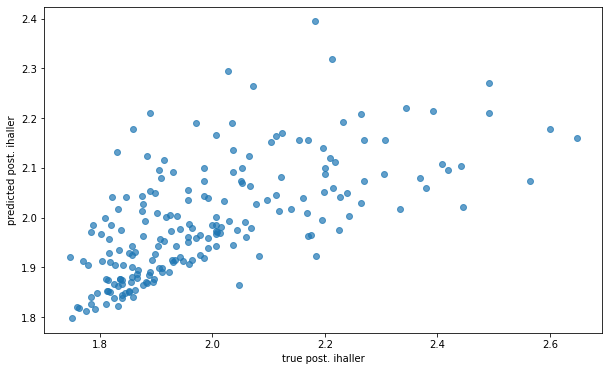

CPU times: total: 46.9 ms
Wall time: 332 ms


In [4]:
%%time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data_path = 'results/haller_index.csv'
data = pd.read_csv(data_path)

if data.isna().any().any():
	data.fillna(data.mean(), inplace=True)

if np.isinf(data.values).any():
	data.replace([np.inf, -np.inf], np.nan, inplace=True)
	data.fillna(data.mean(), inplace=True)  

X = data['pre_haller']
y = data['post_haller']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test = X_train.values.reshape(-1, 1), X_test.values.reshape(-1, 1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

history = model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mae: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('true post. ihaller')
plt.ylabel('predicted post. ihaller')
plt.show()


In [6]:
import joblib
joblib.dump(model, 'deploy/model.pkl')



['deploy/model.pkl']